<h1><font color='crimson' size=4 ><b> Logistic Regression Model to find credit Card defaulter  </b></font></h1>

<h1><font color='Orange'> Table of Contents </h1></font>

1. [Dataset Description](#columns)
2. [Importing the packages and dataset](#packages)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering](#feature)
5. [Building and Evaluating Models](#modelling)
     - 5.1 [Simple Linear Regression](#linear)
     - 5.2 [Logistic Regression](#logistic)
     - 5.3 [Evaluating Simple Linear Regression Model](#lineareval)
     - 5.4 [Evaluating Logistic Regression Model](#logisticeval)   <br><br>
6. [Logistic Regression](#lrmodel)
7. [Metrics for Logistic Regression](#metrics)
     



### 1. Dataset Description  <a id='columns'>

The dataset consists of 10000 individuals and whether their credit card has defaulted or not. Below are the column description:
- **default** : Whether the individual has defaulted
- **student** : Whether the individual is student
- **balance** : The balance in individual's account
- **income** : Income of individual

### 2. Importing the packages and dataset  <a id='packages'>

In [1]:
%matplotlib inline
import pandas_profiling as pds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Mowgli\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Mowgli\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Mowgli\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Mowgli\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Mowgli\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Mowgli\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 497, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
#Load  and reading Credit Default datasets

cred_df = pd.read_csv("D:/BigDataProjects/DataScience/Upx/Machine_Learning_Tracks/Logistic_Regression/attachment_default.csv")

### Performing "Profiling of Datasets" which depicts the colinearity of column variable and other important insights

In [3]:
cred_df.head()
detail_report= pds.ProfileReport(cred_df)
detail_report.to_file("D:/BigDataProjects/DataScience/Upx/Machine_Learning_Tracks/Logistic_Regression/default_card.html")


### 3. Exploratory Data Analysis and finding its colinearity between the column features  <a id='eda'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


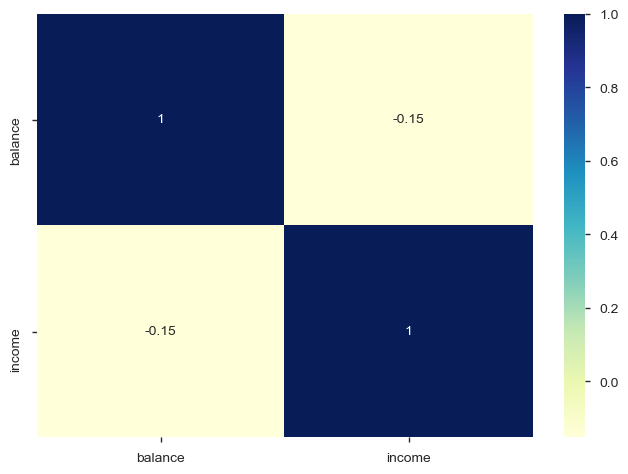

In [4]:
cred_df.info()
sns.heatmap(cred_df.corr(),annot=True,cmap= "YlGnBu")

#### The following figure shows there is having colinearity between balance and income to be -0.15 and same hold vice-Versa

** Observation ** : There are no missing values

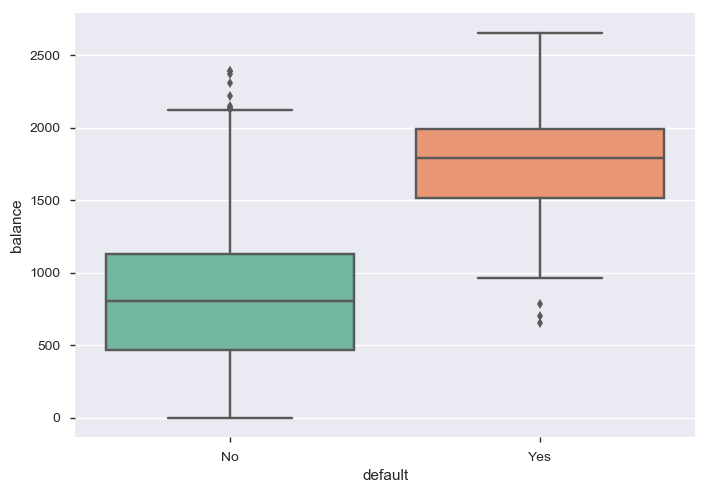

In [5]:
# Relation between balance and default
sns.boxplot(x='default', y='balance', data=cred_df,palette="Set2")
#sns.catplot(x='balance', y='income',col='student',data=cred_df, kind= "box")
plt.show()

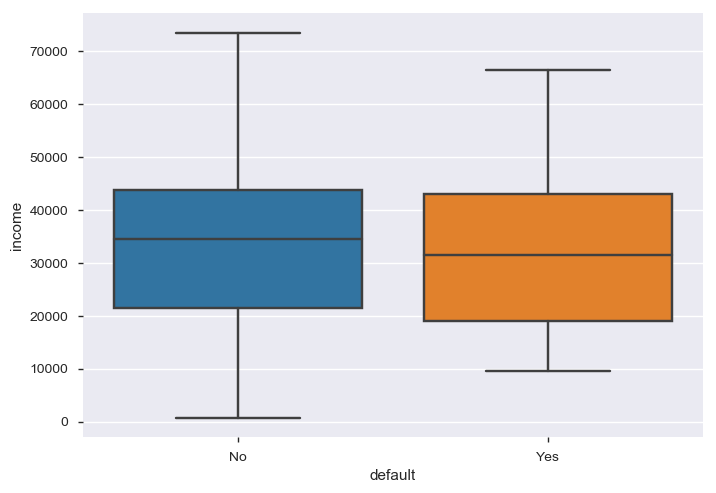

In [6]:
# Relation between income and default
sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

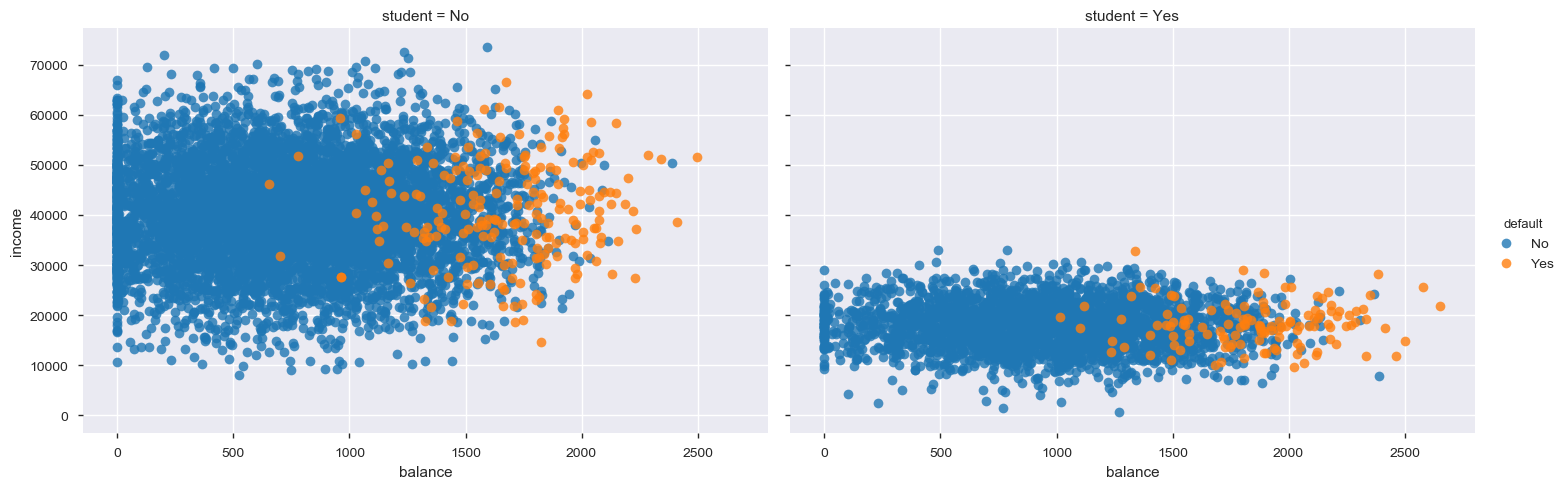

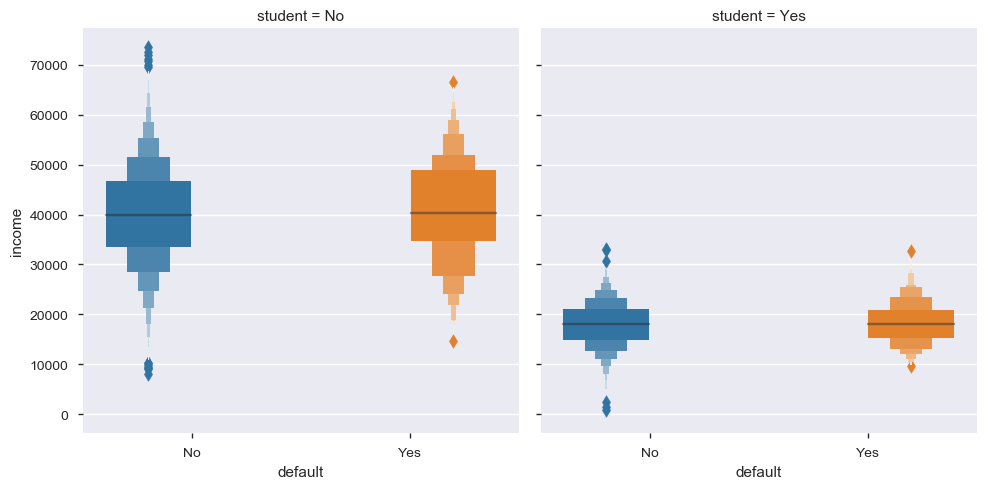

In [7]:
# Relation between balance and income and whether they have defaulted or not 

sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, col='student',aspect=1.5, fit_reg = False)

sns.catplot(x='default', y='income', data=cred_df,hue='default',col='student', kind='boxen')


#plt.figure(figsize=(6,8))
#g=sns.FacetGrid(cred_df, row='balance',col='income')
#g=g.map(plt.scatter,"default")

plt.show()


In [8]:
# Relation between Student and default value representation

pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


### 4. Feature Engineering :  [ Converting Categorial Variable to Numerical Veriable]  <a id='feature'>

In [9]:
# Convert Categorical to Numerical for default column

default_dummies = pd.get_dummies(cred_df.default, prefix='default', drop_first= True)
cred_df = pd.concat([cred_df, default_dummies], axis=1)

cred_df.head()

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [10]:
#default_dummies=pd.get_dummies(cred_df.default,prefix="default")
#default_dummies.drop(default_dummies.columns[0],axis=1,inplace=True)
#cred_df=pd.concat([cred_df,default_dummies],axis=1)
#cred_df.drop(cred_df.columns[4],axis=1,inplace=True)
#cred_df

In [11]:
# Convert Categorical to Numerical for student column

student_dummies = pd.get_dummies(cred_df.student, prefix='student', drop_first= True)
cred_df = pd.concat([cred_df, student_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


### 5. Building and Evaluating Models  <a id='modelling'>

### 5.1 Simple Linear Regression  <a id='linear'>

C:\Users\Mowgli\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


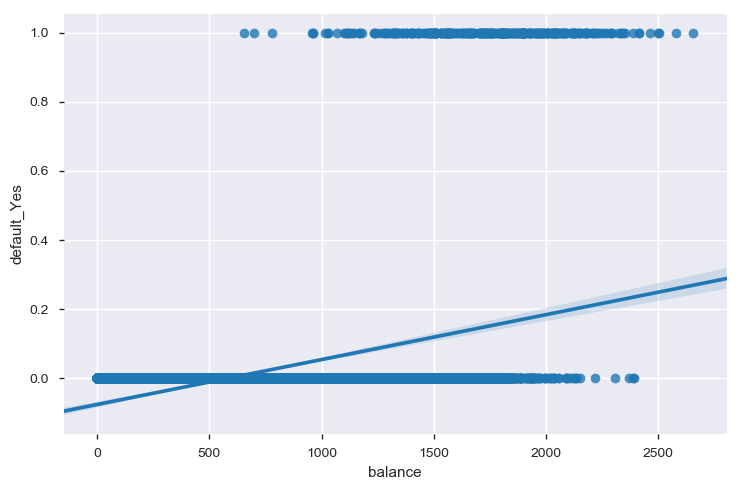

In [12]:
# Try simple linear regression on the data between balance and default

sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, fit_reg = True)

### Buiding the Machine Learning Model : Linear Regression

In [33]:
# Building Linear Regression Model and determining the coefficients
from sklearn.linear_model import LinearRegression

x= cred_df[['balance']]
y= cred_df[['default_Yes']]

linreg= LinearRegression()
linreg.fit(x,y)
print(linreg.coef_)
print(linreg.intercept_)


[[0.00012987]]
[-0.07519196]


### 5.2 Buiding the Machine Learning Model : Logistic Regression  <a id='logistic'>

[[0.00530412]]
[-10.32691114]


C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


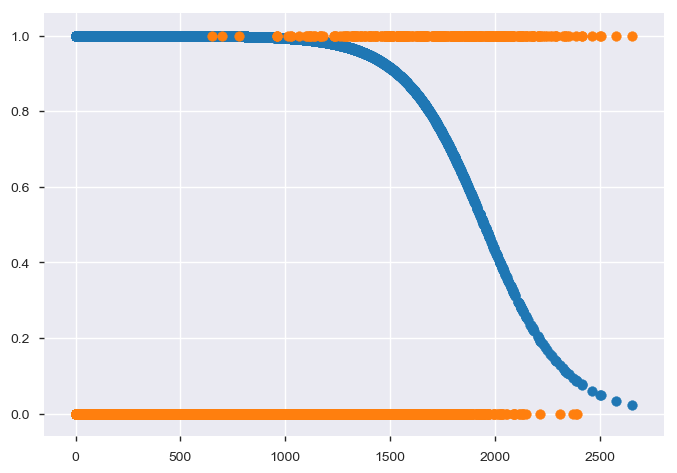

In [14]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42)                            # Set Large C value for low regularization
logreg.fit(x, y)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

y_pred = logreg.predict_proba(x) 
plt.scatter(x.values, y_pred[:,0])                             # Visualization
plt.scatter(x.values, y)
plt.show()

### 5.3 Evaluating Simple Linear Regression Model  <a id='lineareval'>

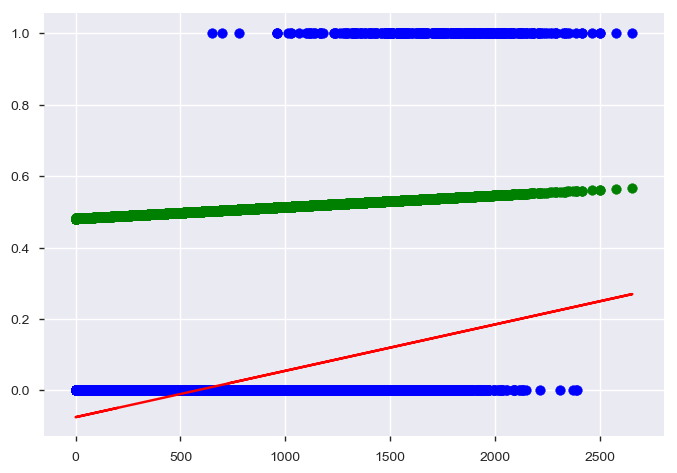

In [15]:
x = x.values
y_hat = linreg.intercept_ + linreg.coef_ * x                  # Predicting y using linear regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                   # Equation for Sigmoid function

plt.plot(x, y_hat, color='red')                               # Visualizing
plt.scatter(x, y, color = 'blue')
plt.scatter(x, sig_y_hat, color = 'green')
plt.show()

### 5.4 Evaluating Logistic Regression Model   <a id='logisticeval'>

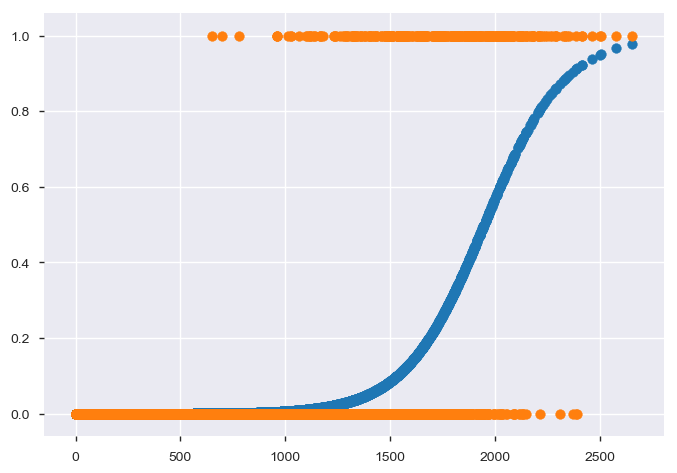

In [16]:
x = x
y_hat = logreg.intercept_ + logreg.coef_ * x                     # Predicting y using linear regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                      # Equation for Sigmoid

plt.scatter(x=x, y=sig_y_hat)                                    # Visualizing
plt.scatter(x=x, y=y)
plt.show()

### 6. Logistic Regression  <a id='lrmodel'>

In [17]:
cred_df.head()

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [18]:
# Removing repeat columns

cred_df.drop(['default', 'student'], axis=1, inplace=True)

In [19]:
cred_df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


#### Spliting X and Y for Train Test Split in  Logistics Regression

In [34]:
# splitting the features and labels

X= cred_df.drop('default_Yes', axis=1)
y = cred_df['default_Yes']

In [21]:
# splitting the data into train and test with 70:30 ratio
from sklearn.cross_validation import train_test_split
x_train, y_train, x_test, y_test= train_test_split(X,y, random_state= 42, test_size=0.30)

C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
# calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1e42)

In [59]:
# fitting the model with x and y attributes of train data
# in this it is goin to learn the pattern
logreg.fit(x_train, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# now applying our learnt model on test and also on train data
y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

### 7. Metrics for Logistic Regression  <a id='metrics'>

In [64]:
# comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(y_test, y_pred_test)

0.9683333333333334

In [65]:
# comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(y_train, y_pred_train)

0.9652857142857143

In [28]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [67]:
conf=metrics.confusion_matrix(y_test,y_pred_test)

In [68]:
print(conf)

[[2905    1]
 [  94    0]]


In [69]:
# Actual Values of y_test
y_test.value_counts()

0    2906
1      94
Name: default_Yes, dtype: int64

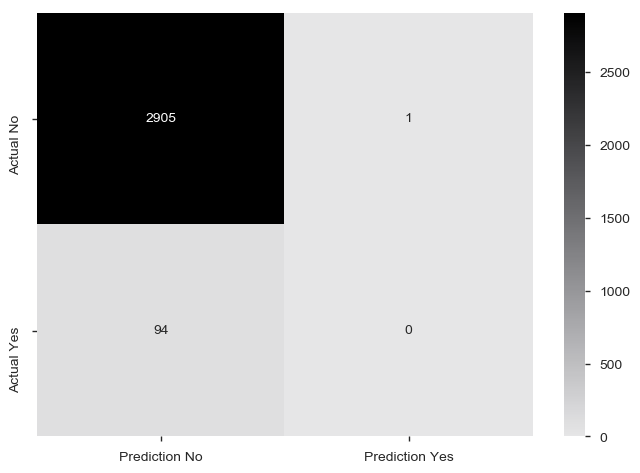

In [70]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [71]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2906
          1       0.00      0.00      0.00        94

avg / total       0.94      0.97      0.95      3000



### The End